K-Means Clustering Algorithm

In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [3]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
print(data_scaled)

[[ 0.63994726  0.84832379  0.14964075 ...  0.46849198  1.4259954
   1.36589591]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.36506078 -0.19067191
  -0.73212021]
 [ 1.23388019  1.94372388 -0.26394125 ...  0.60439732 -0.10558415
   1.36589591]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.68519336 -0.27575966
  -0.73212021]
 [-0.84488505  0.1597866  -0.47073225 ... -0.37110101  1.17073215
   1.36589591]
 [-0.84488505 -0.8730192   0.04624525 ... -0.47378505 -0.87137393
  -0.73212021]]


In [7]:
#clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(data_scaled)
print(clusters)

[1 2 1 2 0 2 2 2 0 1 2 1 1 0 1 2 0 1 2 0 0 1 1 1 1 1 1 2 1 1 1 0 2 2 1 2 1
 1 2 0 2 1 1 0 1 0 2 2 1 2 2 2 2 0 0 2 0 0 0 2 2 1 2 2 1 2 0 1 2 2 0 2 1 2
 2 2 1 2 2 2 2 2 2 2 1 2 1 2 1 2 2 2 1 1 2 0 2 2 2 0 0 2 2 2 2 2 2 2 2 2 0
 0 2 2 0 1 1 2 2 2 0 2 2 1 2 0 2 2 0 1 0 1 0 1 2 2 2 2 2 2 1 1 2 1 0 2 1 2
 1 2 0 2 0 0 1 0 2 2 2 1 1 1 0 2 1 1 2 2 2 2 1 0 2 2 2 0 1 0 1 1 2 2 2 2 1
 1 0 0 0 0 2 1 1 1 1 0 2 2 0 0 2 2 2 2 1 2 0 1 2 1 2 0 1 0 1 0 0 2 1 1 0 1
 2 1 2 2 2 0 0 2 1 0 2 2 2 1 0 0 1 2 2 2 2 0 0 1 1 0 0 2 1 2 2 2 1 2 2 2 0
 0 0 2 2 1 1 1 2 2 2 2 1 2 2 2 1 2 1 2 1 2 2 1 1 1 1 1 0 0 2 2 2 0 0 0 1 0
 0 2 1 1 2 0 2 1 2 2 1 2 0 0 2 2 0 2 1 2 2 1 2 1 2 2 2 1 2 2 0 1 0 2 1 2 1
 1 2 0 2 1 0 1 2 2 2 1 1 1 2 2 2 2 2 2 2 2 2 1 0 1 1 0 0 1 1 1 0 2 1 2 2 0
 0 2 2 2 0 0 2 2 1 0 2 2 2 2 2 2 1 1 0 2 2 1 2 2 1 0 2 2 2 0 1 1 0 1 1 2 1
 2 1 0 2 2 0 2 0 0 2 0 2 2 0 2 2 2 0 0 2 0 0 0 2 2 2 2 2 2 1 2 2 1 0 2 2 1
 1 0 2 2 2 2 2 2 2 1 2 1 1 2 0 1 1 2 2 2 1 2 2 2 1 0 0 2 2 1 2 1 0 2 1 1 0
 2 2 2 2 0 0 0 2 1 2 2 2 

In [8]:
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans_final.fit_predict(data_scaled)

In [9]:
from sklearn.decomposition import PCA

#applying pca
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data_scaled)
centroids_pca = pca.transform(kmeans_final.cluster_centers_)

print("\nFirst 5 PCA transformed values:")
print(X_pca[:5])   



First 5 PCA transformed values:
[[ 1.75694707  1.11174258]
 [-1.50742148 -0.55940565]
 [ 0.65082201  1.92957633]
 [-1.58739782 -1.06507465]
 [ 2.48337392 -2.35956252]]


In [10]:
print("\nCluster centroids in PCA space:")
print(centroids_pca)



Cluster centroids in PCA space:
[[ 1.88680033 -0.91316119]
 [ 0.52369114  1.5857962 ]
 [-1.10585235 -0.51853315]]


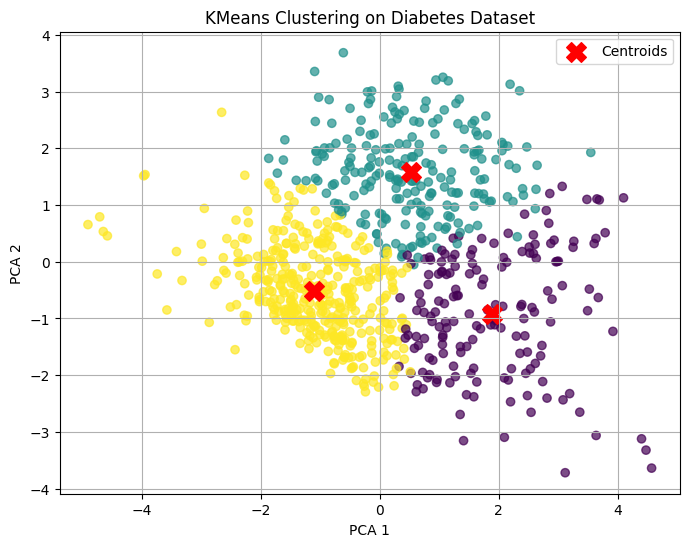

In [11]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap="viridis", alpha=0.7)
plt.scatter(centroids_pca[:,0], centroids_pca[:,1], 
            c="red", marker="X", s=200, label="Centroids")

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("KMeans Clustering on Diabetes Dataset")
plt.legend()
plt.grid(True)
plt.show()